In [1]:
import pandas as pd
import numpy as np
import json
import re
import seaborn as sns
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [2]:
steam_df = pd.read_csv('./data/steam-200k.csv', header=None, index_col=None, names=['UserID', 'Game', 'Action', 'Hours', 'Other'])

In [3]:
steam_df.head(25)

,UserID,Game,Action,Hours,Other
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0
5,151603712,Spore,play,14.9,0
6,151603712,Fallout New Vegas,purchase,1.0,0
7,151603712,Fallout New Vegas,play,12.1,0
8,151603712,Left 4 Dead 2,purchase,1.0,0
9,151603712,Left 4 Dead 2,play,8.9,0


In [4]:
steam_df.value_counts()

UserID     Game                                          Action    Hours  Other
93275329   Grand Theft Auto Vice City                    purchase  1.0    0        2
116876958  Grand Theft Auto III                          purchase  1.0    0        2
27169419   Sid Meier's Civilization IV Beyond the Sword  purchase  1.0    0        2
           Sid Meier's Civilization IV                   purchase  1.0    0        2
46028967   Sid Meier's Civilization IV                   purchase  1.0    0        2
                                                                                  ..
127072755  Mortal Kombat Komplete Edition                purchase  1.0    0        1
                                                         play      0.3    0        1
           Just Cause 2 Multiplayer Mod                  purchase  1.0    0        1
                                                         play      0.7    0        1
5250       Alien Swarm                                   play      4.9

In [5]:
play_data = steam_df[steam_df['Action'] == 'play']

In [6]:
play_data_new = play_data.drop(['Action', 'Other'], axis=1)

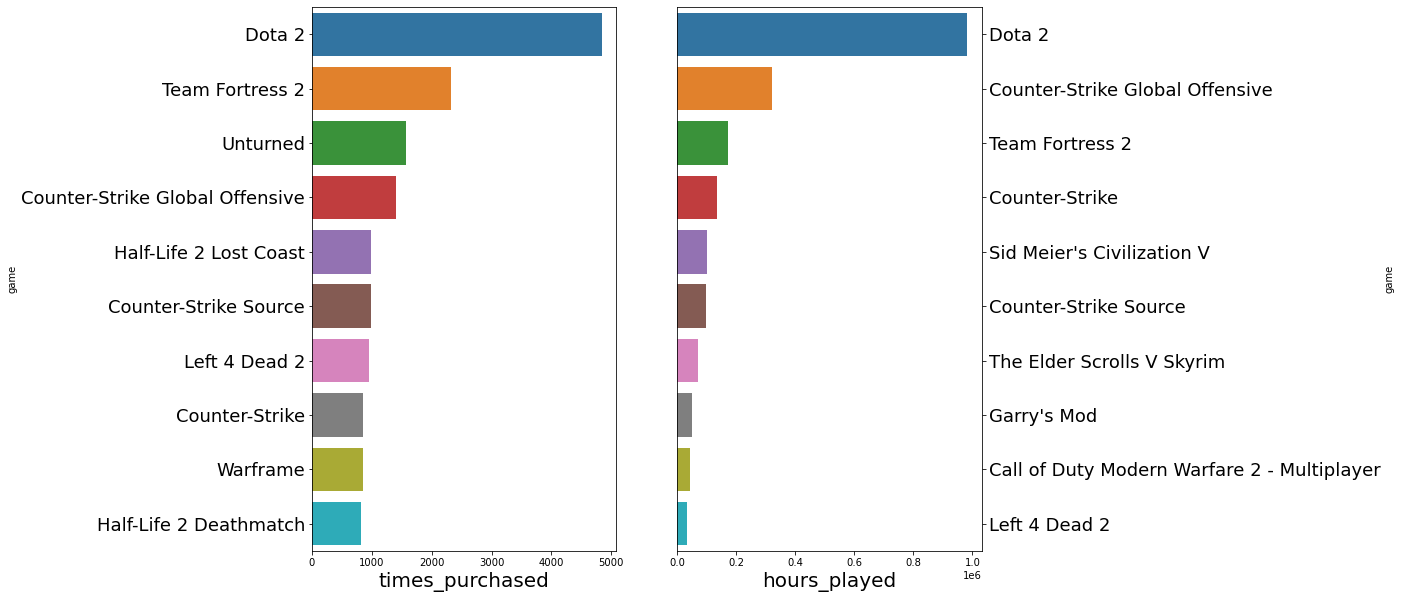

In [7]:
nb_games = 10
df_purchase = steam_df.loc[steam_df['Action'] == 'purchase']
purchased_times = df_purchase.groupby('Game')['Game'].agg('count').sort_values(ascending=False)
purchased_times = pd.DataFrame({'game': purchased_times.index, 'times_purchased': purchased_times.values})[0:nb_games]

play_data = steam_df[steam_df['Action'] == 'play']
hours_played = play_data.groupby('Game')['Hours'].agg(np.sum).sort_values(ascending=False)
hours_played = pd.DataFrame({'game': hours_played.index, 'hours_played': hours_played.values})[0:nb_games]

fig, ax = plt.subplots(1,2,figsize=(12,nb_games))

sns.barplot(y = 'game', x = 'times_purchased', data = purchased_times, ax=ax[0])
sns.barplot(y = 'game', x = 'hours_played', data = hours_played, ax=ax[1])


ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")
for i in range(0,2):
    ax[i].tick_params(axis='y', labelsize=18)
    ax[i].xaxis.label.set_size(20)

In [8]:
game_hours_min_max = play_data_new.groupby('Game')['Hours'].agg(['min', 'max']).reset_index()

In [9]:
# Define a new function for cumulative hours to fit the rating system
# Recalculate the total hours played for each game across all users
# Create a DataFrame for the rating of each game
game_hours_min_max.columns = ['Game', 'Min_Hours', 'Max_Hours']

# Merge this with the original play_data_new DataFrame
play_data_agg_min_max = play_data_new.merge(game_hours_min_max, on='Game')

play_data_agg_min_max.head()

,UserID,Game,Hours,Min_Hours,Max_Hours
0,151603712,The Elder Scrolls V Skyrim,273.0,0.1,1986.0
1,59945701,The Elder Scrolls V Skyrim,58.0,0.1,1986.0
2,92107940,The Elder Scrolls V Skyrim,110.0,0.1,1986.0
3,250006052,The Elder Scrolls V Skyrim,465.0,0.1,1986.0
4,11373749,The Elder Scrolls V Skyrim,220.0,0.1,1986.0


In [10]:
play_data_agg_min_max.tail(50)

,UserID,Game,Hours,Min_Hours,Max_Hours
70439,154230723,Aces Wild Manic Brawling Action!,0.2,0.2,0.5
70440,231416829,D4 Dark Dreams Don't Die,0.5,0.5,0.5
70441,20772968,BloodRayne,6.6,6.6,6.6
70442,20772968,Carmageddon Max Pack,2.8,2.8,2.8
70443,20772968,Coniclysm,0.3,0.3,0.3
70444,20772968,Alien Shooter Revisited,0.1,0.1,0.1
70445,213854339,Eastside Hockey Manager,1295.0,1295.0,1295.0
70446,213854339,Franchise Hockey Manager 2,11.2,11.2,11.2
70447,47384303,Kohan Immortal Sovereigns,7.9,7.9,7.9
70448,47384303,Avadon 2 The Corruption,2.9,2.9,2.9


In [11]:
filtered_data = play_data_agg_min_max.loc[play_data_agg_min_max['Min_Hours'] != play_data_agg_min_max['Max_Hours']]

In [12]:
filtered_data

,UserID,Game,Hours,Min_Hours,Max_Hours
0,151603712,The Elder Scrolls V Skyrim,273.0,0.1,1986.0
1,59945701,The Elder Scrolls V Skyrim,58.0,0.1,1986.0
2,92107940,The Elder Scrolls V Skyrim,110.0,0.1,1986.0
3,250006052,The Elder Scrolls V Skyrim,465.0,0.1,1986.0
4,11373749,The Elder Scrolls V Skyrim,220.0,0.1,1986.0
...,...,...,...,...,...
70424,60859695,Nancy Drew Ghost Dogs of Moon Lake,5.9,4.3,5.9
70436,162081645,Haunt the House Terrortown,1.3,0.8,1.3
70437,154230723,Haunt the House Terrortown,0.8,0.8,1.3
70438,142793906,Aces Wild Manic Brawling Action!,0.5,0.2,0.5


In [13]:
def ratings_normalize(d):
    new_series = d['Hours'] / d['Max_Hours']
    return new_series

In [14]:
filtered_data['Hours']

0        273.0
1         58.0
2        110.0
3        465.0
4        220.0
         ...  
70424      5.9
70436      1.3
70437      0.8
70438      0.5
70439      0.2
Name: Hours, Length: 69432, dtype: float64

In [15]:
filtered_data['Ratings'] = filtered_data.apply(lambda x: (x["Hours"] / x["Max_Hours"]), axis=1)

<ipython-input-15-aef263175d1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Ratings'] = filtered_data.apply(lambda x: (x["Hours"] / x["Max_Hours"]), axis=1)


In [16]:
filtered_data

,UserID,Game,Hours,Min_Hours,Max_Hours,Ratings
0,151603712,The Elder Scrolls V Skyrim,273.0,0.1,1986.0,0.137462
1,59945701,The Elder Scrolls V Skyrim,58.0,0.1,1986.0,0.029204
2,92107940,The Elder Scrolls V Skyrim,110.0,0.1,1986.0,0.055388
3,250006052,The Elder Scrolls V Skyrim,465.0,0.1,1986.0,0.234139
4,11373749,The Elder Scrolls V Skyrim,220.0,0.1,1986.0,0.110775
...,...,...,...,...,...,...
70424,60859695,Nancy Drew Ghost Dogs of Moon Lake,5.9,4.3,5.9,1.000000
70436,162081645,Haunt the House Terrortown,1.3,0.8,1.3,1.000000
70437,154230723,Haunt the House Terrortown,0.8,0.8,1.3,0.615385
70438,142793906,Aces Wild Manic Brawling Action!,0.5,0.2,0.5,1.000000


In [17]:
filtered_data_new = pd.read_csv('./data/filtered_steam_games.csv', index_col=[0])

In [18]:
# baseline

In [19]:
from surprise import Dataset, Reader, NormalPredictor
from surprise.model_selection import cross_validate

# Prepare the data for Surprise
reader = Reader(rating_scale=(filtered_data_new['Ratings'].min(), filtered_data_new['Ratings'].max()))
data = Dataset.load_from_df(filtered_data_new[['UserID', 'Game', 'Ratings']], reader)

# Define the NormalPredictor model
algo = NormalPredictor()

# Perform cross-validation and compute RMSE
results = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=True)

# Average RMSE
average_rmse = sum(results['test_rmse']) / len(results['test_rmse'])
print(f'Average RMSE using NormalPredictor: {average_rmse}')

Evaluating RMSE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.2945  0.2961  0.2917  0.2925  0.2954  0.2940  0.0017  
Fit time          0.02    0.03    0.03    0.03    0.03    0.03    0.00    
Test time         0.03    0.07    0.03    0.03    0.03    0.04    0.02    
Average RMSE using NormalPredictor: 0.29403403758013474


In [20]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate


# Define the Reader
reader = Reader(rating_scale=(0, 1))

# Load the dataset into Surprise
data = Dataset.load_from_df(filtered_data_new[['UserID', 'Game', 'Ratings']], reader)

# SVD algo
algo_svd = SVD()

# Perform cross-validation
svd_results = cross_validate(algo_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.2154  0.2162  0.2167  0.2166  0.2140  0.2158  0.0010  
MAE (testset)     0.1265  0.1269  0.1259  0.1260  0.1252  0.1261  0.0006  
Fit time          1.34    1.32    1.33    1.30    1.31    1.32    0.01    
Test time         0.03    0.03    0.03    0.03    0.03    0.03    0.00    


In [21]:
from surprise import Reader, Dataset, KNNWithMeans
from surprise.model_selection import cross_validate


# Define the Reader
reader = Reader(rating_scale=(0, 1))

# Load the dataset into Surprise
data = Dataset.load_from_df(filtered_data[['UserID', 'Game', 'Ratings']], reader)

# Configure KNNWithMeans
algo_knnm = KNNWithMeans(sim_options={'name': 'cosine', 'user_based': True})

# Perform cross-validation
results_knnm = cross_validate(algo_knnm, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.2278  0.2221  0.2311  0.2247  0.2269  0.2265  0.0030  
MAE (testset)     0.1367  0.1359  0.1393  0.1374  0.1371  0.1373  0.0011  
Fit time          5.45    5.52    5.84    5.59    5.76    5.63    0.15    
Test time         0.91    0.88    0.91    0.88    0.94    0.90    0.02    


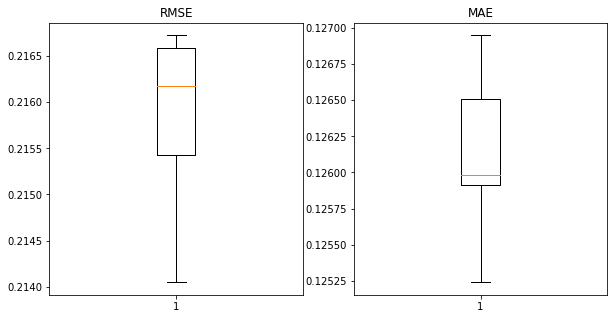

In [22]:
rmse = svd_results['test_rmse']
mae = svd_results['test_mae']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(rmse)
plt.title('RMSE')
plt.subplot(1, 2, 2)
plt.boxplot(mae)
plt.title('MAE')
plt.show()

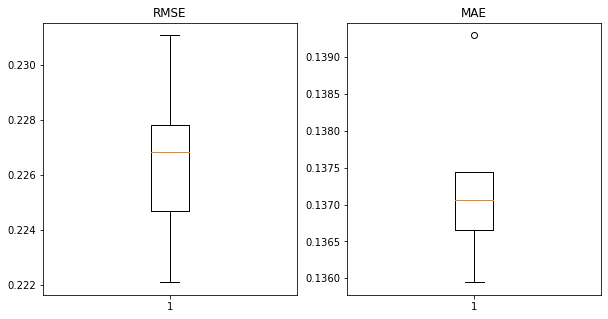

In [23]:
rmse = results_knnm['test_rmse']
mae = results_knnm['test_mae']

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(rmse)
plt.title('RMSE')
plt.subplot(1, 2, 2)
plt.boxplot(mae)
plt.title('MAE')
plt.show()

In [24]:
from surprise import Dataset, Reader
from surprise.model_selection import GridSearchCV
from surprise import SVDpp

# Load your dataset
dataset = pd.read_csv('./data/filtered_steam_games.csv')

# Prepare the data for Surprise
reader = Reader(rating_scale=(dataset['Ratings'].min(), dataset['Ratings'].max()))
data = Dataset.load_from_df(dataset[['UserID', 'Game', 'Ratings']], reader)

# Define a range of hyperparameters for GridSearchCV with SVD++
param_grid = {
    'n_factors': [50, 100, 150],  # Number of factors
    'n_epochs': [20, 30],  # Number of epochs
    'lr_all': [0.005, 0.01],  # Learning rate
    'reg_all': [0.02, 0.1]  # Regularization term
}

# Setup GridSearchCV with SVD++
gs_svdpp = GridSearchCV(SVDpp, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=-1)

# Fit the model
gs_svdpp.fit(data)

# Best score and parameters
best_rmse = gs_svdpp.best_score['rmse']
best_params = gs_svdpp.best_params['rmse']

print(f"Best RMSE: {best_rmse}")
print(f"Best parameters: {best_params}")


Best RMSE: 0.20888987597373845
Best parameters: {'n_factors': 50, 'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.1}


In [25]:
# Need to remove outliers in the 'Hours' column for more sufficient dataset

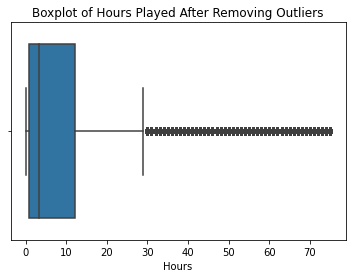

In [26]:
# Calculate IQR for 'Hours'
Q1 = filtered_data_new['Hours'].quantile(0.25)
Q3 = filtered_data_new['Hours'].quantile(0.75)
IQR = Q3 - Q1

# Define an upper bound for outliers
upper_bound = Q3 + 3 * IQR

# Removing outliers from 'Hours'
cleaned_dataset = filtered_data_new[filtered_data_new['Hours'] <= upper_bound]

# New basic statistics  after removing outliers
cleaned_numerical_stats = cleaned_dataset.describe()

# Plotting the new distribution of 'Hours'
plt.figure(figsize=(6, 4))
sns.boxplot(x=cleaned_dataset['Hours'])
plt.title('Boxplot of Hours Played After Removing Outliers')
plt.show()

In [27]:
outliers_removed = filtered_data_new.shape[0] - cleaned_dataset.shape[0]

In [28]:
outliers_removed

7024

In [29]:
filtered_data_new.shape

(69432, 6)

In [30]:
cleaned_dataset.shape

(62408, 6)

In [31]:
from surprise import Dataset, Reader
from surprise.model_selection import GridSearchCV
from surprise import SVDpp

# Prepare the data for Surprise
reader = Reader(rating_scale=(cleaned_dataset['Ratings'].min(), cleaned_dataset['Ratings'].max()))
data = Dataset.load_from_df(cleaned_dataset[['UserID', 'Game', 'Ratings']], reader)

# Define a range of hyperparameters
param_grid = {
    'n_factors': [50, 100, 150],  # Number of factors
    'n_epochs': [20, 30],  # Number of epochs
    'lr_all': [0.005, 0.01],  # Learning rate
    'reg_all': [0.02, 0.1],  # Regularization term
    'random_state': [42]    # random_state
}

# GridSearchCV with SVD++
gs_svdpp = GridSearchCV(SVDpp, param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=-1)

# Fit the model
svdp_model = gs_svdpp.fit(data)

# Best score and parameters
best_rmse = gs_svdpp.best_score['rmse']
best_params = gs_svdpp.best_params['rmse']

print(f"Best RMSE: {best_rmse}")
print(f"Best parameters: {best_params}")

Best RMSE: 0.18911270014473006
Best parameters: {'n_factors': 50, 'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.1, 'random_state': 42}


In [33]:
gs_svdpp.cv_results

{'split0_test_rmse': array([0.19487168, 0.19210345, 0.19240421, 0.19001824, 0.19312367,
        0.19058456, 0.19164316, 0.18951835, 0.19987629, 0.19394219,
        0.19641708, 0.19090654, 0.19760569, 0.19185914, 0.19492203,
        0.18992757, 0.20437213, 0.19557428, 0.19980986, 0.19173712,
        0.20148652, 0.19301287, 0.19757855, 0.19038569]),
 'split1_test_rmse': array([0.19473143, 0.19169416, 0.1922716 , 0.18937347, 0.19297765,
        0.19002201, 0.19159399, 0.18878306, 0.19809106, 0.192196  ,
        0.19418132, 0.18911465, 0.19551723, 0.19002088, 0.19258682,
        0.18832497, 0.20278327, 0.19445168, 0.1981412 , 0.19047423,
        0.19984722, 0.19173933, 0.19598412, 0.18925127]),
 'split2_test_rmse': array([0.19120617, 0.18859632, 0.18868553, 0.18656651, 0.18941469,
        0.1870922 , 0.18796653, 0.18620158, 0.19689387, 0.19106125,
        0.19310515, 0.18774375, 0.19439444, 0.18880524, 0.19158653,
        0.18671051, 0.20201112, 0.19281948, 0.1970623 , 0.18859799,
        

In [34]:
results_df = pd.DataFrame.from_dict(gs_svdpp.cv_results)

In [35]:
results_df

,split0_test_rmse,split1_test_rmse,split2_test_rmse,split3_test_rmse,split4_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,split0_test_mae,split1_test_mae,...,mean_fit_time,std_fit_time,mean_test_time,std_test_time,params,param_n_factors,param_n_epochs,param_lr_all,param_reg_all,param_random_state
0,0.194872,0.194731,0.191206,0.194537,0.198084,0.194686,0.002178,16,0.105828,0.104854,...,39.178943,0.180306,0.403794,0.011255,"{'n_factors': 50, 'n_epochs': 20, 'lr_all': 0....",50,20,0.005,0.02,42
1,0.192103,0.191694,0.188596,0.191592,0.195391,0.191875,0.002158,10,0.102488,0.101612,...,38.040220,0.396053,0.382674,0.005954,"{'n_factors': 50, 'n_epochs': 20, 'lr_all': 0....",50,20,0.005,0.10,42
2,0.192404,0.192272,0.188686,0.191940,0.195291,0.192119,0.002097,11,0.104586,0.103684,...,39.095751,3.002586,0.383607,0.005420,"{'n_factors': 50, 'n_epochs': 20, 'lr_all': 0....",50,20,0.010,0.02,42
3,0.190018,0.189373,0.186567,0.189245,0.193040,0.189649,0.002068,3,0.101985,0.100810,...,39.589708,0.456944,0.396932,0.008147,"{'n_factors': 50, 'n_epochs': 20, 'lr_all': 0....",50,20,0.010,0.10,42
4,0.193124,0.192978,0.189415,0.192724,0.196189,0.192886,0.002147,13,0.104682,0.103753,...,58.506384,1.533807,0.382565,0.008076,"{'n_factors': 50, 'n_epochs': 30, 'lr_all': 0....",50,30,0.005,0.02,42
5,0.190585,0.190022,0.187092,0.189919,0.193771,0.190278,0.002128,5,0.101746,0.100678,...,56.705674,0.195002,0.386960,0.005473,"{'n_factors': 50, 'n_epochs': 30, 'lr_all': 0....",50,30,0.005,0.10,42
6,0.191643,0.191594,0.187967,0.191156,0.194439,0.191360,0.002058,8,0.103714,0.102774,...,57.793771,1.320884,0.383096,0.009108,"{'n_factors': 50, 'n_epochs': 30, 'lr_all': 0....",50,30,0.010,0.02,42
7,0.189518,0.188783,0.186202,0.188636,0.192424,0.189113,0.001997,1,0.101718,0.100376,...,59.124921,0.491501,0.398635,0.011901,"{'n_factors': 50, 'n_epochs': 30, 'lr_all': 0....",50,30,0.010,0.10,42
8,0.199876,0.198091,0.196894,0.199548,0.204039,0.199690,0.002423,22,0.110723,0.110178,...,70.884008,2.849699,0.393437,0.009985,"{'n_factors': 100, 'n_epochs': 20, 'lr_all': 0...",100,20,0.005,0.02,42
9,0.193942,0.192196,0.191061,0.193128,0.197791,0.193624,0.002294,14,0.104038,0.103014,...,68.055821,1.509764,0.395575,0.009515,"{'n_factors': 100, 'n_epochs': 20, 'lr_all': 0...",100,20,0.005,0.10,42


In [40]:
from surprise import SVDpp
from surprise import Dataset

# Load the full dataset from the dataframe
reader = Reader(rating_scale=(cleaned_dataset['Ratings'].min(), cleaned_dataset['Ratings'].max()))
data = Dataset.load_from_df(cleaned_dataset[['UserID', 'Game', 'Ratings']], reader)

# Build the full trainset
full_trainset = data.build_full_trainset()

# Set up the SVD++ algorithm with the given best parameters
algo = SVDpp(n_factors=50, n_epochs=30, lr_all=0.01, reg_all=0.1, random_state=42)

# Fit the algorithm on the full trainset
algo.fit(full_trainset)

In [41]:
from collections import defaultdict

def get_top_n_recommendations(algo, trainset, n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for inner_uid in trainset.all_users():
        # Retrieve the inner ids of items that the user has already rated
        user_items = set([j for (j, _) in trainset.ur[inner_uid]])
        # Predict ratings for all items the user hasn't rated
        user_ratings = [(trainset.to_raw_iid(inner_iid), algo.predict(trainset.to_raw_uid(inner_uid), trainset.to_raw_iid(inner_iid)).est)
                        for inner_iid in trainset.all_items()
                        if inner_iid not in user_items]
        # Retrieve the top N highest-rated items for this user
        top_n[trainset.to_raw_uid(inner_uid)].extend(sorted(user_ratings, key=lambda x: x[1], reverse=True)[:n])
    
    return top_n

# Using the best SVD++ estimator from GridSearchCV results and full trainset
top_n_recommendations = get_top_n_recommendations(algo, full_trainset, n=10)

# Display the recommendations for the first few users for demonstration
for user, user_recommendations in list(top_n_recommendations.items())[:5]:
    print(f"User: {user}")
    for item, rating in user_recommendations:
        print(f"\tI: {item}, Estimated Rating: {rating}")

User: 59945701
	Item: Color Symphony, Estimated Rating: 0.5782096129480394
	Item: Gladiators Online Death Before Dishonor, Estimated Rating: 0.5695971082595016
	Item: Battle Battalions, Estimated Rating: 0.5612957806100842
	Item: Let the Cat In, Estimated Rating: 0.5454167538833639
	Item: DeathSpank, Estimated Rating: 0.5359164248042716
	Item: Layers of Fear, Estimated Rating: 0.5329383559547854
	Item: Super House of Dead Ninjas, Estimated Rating: 0.5291551302759325
	Item: The Old Tree, Estimated Rating: 0.5287131942402388
	Item: Skyborn, Estimated Rating: 0.5251101433985266
	Item: Back to the Future Ep 1 - It's About Time, Estimated Rating: 0.5217852454624861
User: 54103616
	Item: Battle Battalions, Estimated Rating: 0.6382916872960064
	Item: Color Symphony, Estimated Rating: 0.6242452867053326
	Item: Gladiators Online Death Before Dishonor, Estimated Rating: 0.6146296322906977
	Item: Back to the Future Ep 1 - It's About Time, Estimated Rating: 0.6090440903112027
	Item: Aeon Command, 

In [46]:
import random
from collections import defaultdict

def get_recommendations_for_random_users(algo, full_trainset, n=10, num_users=3):
    """Generate top-n recommendations for a random sample of users."""
    top_n = defaultdict(list)
    
    # Get a random sample of users from the trainset
    all_users = list(full_trainset.all_users())
    random_users = random.sample(all_users, num_users)
    
    for inner_uid in random_users:
        # Retrieve the inner ids of items that the user has already rated
        user_items = set([j for (j, _) in full_trainset.ur[inner_uid]])
        # Predict ratings for all items the user hasn't rated
        user_ratings = [(full_trainset.to_raw_iid(inner_iid), algo.predict(full_trainset.to_raw_uid(inner_uid), full_trainset.to_raw_iid(inner_iid)).est)
                        for inner_iid in full_trainset.all_items()
                        if inner_iid not in user_items]
        # Retrieve the top N highest-rated items for this user
        top_n[full_trainset.to_raw_uid(inner_uid)].extend(sorted(user_ratings, key=lambda x: x[1], reverse=True)[:n])
    
    return top_n

# Generate recommendations for a random sample of users
num_random_users = 3 
random_user_recommendations = get_recommendations_for_random_users(algo, full_trainset, n=10, num_users=num_random_users)

# Display the recommendations for the sampled users
for user, user_recommendations in random_user_recommendations.items():
    print(f"User: {user}")
    for item, rating in user_recommendations:
        print(f"\tGame: {item}, Estimated Rating: {rating}")

User: 96144791
	Game: Holy Potatoes! A Weapon Shop?!, Estimated Rating: 0.6612051266816767
	Game: Back to the Future Ep 3 - Citizen Brown, Estimated Rating: 0.6226245273097712
	Game: Plug & Play, Estimated Rating: 0.6069046520447766
	Game: Dr. Langeskov, The Tiger, and The Terribly Cursed Emerald A Whirlwind Heist, Estimated Rating: 0.5772206224695702
	Game: Bob Came in Pieces, Estimated Rating: 0.5664228935712377
	Game: Super House of Dead Ninjas, Estimated Rating: 0.5621988224380452
	Game: FarSky, Estimated Rating: 0.5615585991572303
	Game: Anna's Quest, Estimated Rating: 0.5610146508404761
	Game: The Old Tree, Estimated Rating: 0.5557224181027903
	Game: Color Symphony, Estimated Rating: 0.5491649745288262
User: 96269099
	Game: Battle Battalions, Estimated Rating: 0.6310706879696681
	Game: Color Symphony, Estimated Rating: 0.5718977353923427
	Game: Dysfunctional Systems Learning to Manage Chaos, Estimated Rating: 0.5397262166645584
	Game: Plug & Play, Estimated Rating: 0.535320084156

In [52]:
import random
from collections import defaultdict

def get_recommendations_for_random_users(algo, full_trainset, n=10, num_users=5):
    """Generate top-n recommendations for a random sample of users."""
    top_n = defaultdict(list)
    
    # Get a random sample of users from the trainset
    all_users = list(full_trainset.all_users())
    random_users = random.sample(all_users, num_users)
    
    for inner_uid in random_users:
        # Retrieve the inner ids of items that the user has already rated
        user_items = set([j for (j, _) in full_trainset.ur[inner_uid]])
        # Predict ratings for all items the user hasn't rated
        user_ratings = [(full_trainset.to_raw_iid(inner_iid), algo.predict(full_trainset.to_raw_uid(inner_uid), full_trainset.to_raw_iid(inner_iid)).est)
                        for inner_iid in full_trainset.all_items()
                        if inner_iid not in user_items]
        # Retrieve the top N highest-rated items for this user
        top_n[full_trainset.to_raw_uid(inner_uid)].extend(sorted(user_ratings, key=lambda x: x[1], reverse=True)[:n])
    
    return top_n

# Generate recommendations for a random sample of users
num_random_users = 5 
random_user_recommendations = get_recommendations_for_random_users(algo, full_trainset, n=10, num_users=num_random_users)

# Display the recommendations for the sampled users
for user, user_recommendations in random_user_recommendations.items():
    print(f"User: {user}")
    for item, rating in user_recommendations:
        print(f"\tGame: {item}, Estimated Rating: {rating}")

User: 283636252
	Game: Color Symphony, Estimated Rating: 0.6816991049957097
	Game: Back to the Future Ep 3 - Citizen Brown, Estimated Rating: 0.6047527029285961
	Game: Gladiators Online Death Before Dishonor, Estimated Rating: 0.6008449376816043
	Game: Holy Potatoes! A Weapon Shop?!, Estimated Rating: 0.5818012350863009
	Game: Serious Sam Double D XXL, Estimated Rating: 0.5804747099796572
	Game: Age of Wonders Shadow Magic, Estimated Rating: 0.5462647310117206
	Game: Hell Yeah!, Estimated Rating: 0.5455656925501389
	Game: Unreal II The Awakening, Estimated Rating: 0.5437066162307561
	Game: Gomo, Estimated Rating: 0.5383482015438235
	Game: Lego Star Wars 3 The Clone Wars, Estimated Rating: 0.5237092389200655
User: 199236587
	Game: Grim Legends The Forsaken Bride, Estimated Rating: 0.6705783782298216
	Game: inMomentum, Estimated Rating: 0.6702740754291523
	Game: Battle Battalions, Estimated Rating: 0.6656470489437735
	Game: bit Dungeon II, Estimated Rating: 0.6560215144389483
	Game: Glad